In [1]:
# 多层感知机从零开始实现
import torch
from torch import nn
from d2l import torch as d2l
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [6]:
# 实现一个具有单隐藏层的多层感知机，它具有256个隐藏层单元
num_inputs, num_hiddens, num_outputs = 784, 256, 10
w1 = nn.Parameter(torch.randn(num_inputs, num_hiddens, requires_grad=True))
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
w2 = nn.Parameter(torch.randn(num_hiddens, num_outputs, requires_grad=True))
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))
params = [w1, b1, w2, b2]

In [3]:
# 定义激活函数
def ReLU(x):
    a = torch.zeros_like(x)
    return torch.max(a, x)

nn.CrossEntropyLoss() 函数是 PyTorch 中用于计算交叉熵损失的函数。

其中 reduction 参数用于控制输出损失的形式。

当 reduction='none' 时，函数会输出一个形状为 (batch_size, num_classes) 的矩阵，表示每个样本的每个类别的损失。

当 reduction='sum' 时，函数会对矩阵求和，输出一个标量，表示所有样本的损失之和。

当 reduction='elementwise_mean' 时，函数会对矩阵求平均，输出一个标量，表示所有样本的平均损失。

在您的例子中，在使用 reduction='none' 时无法训练，是因为需要一个标量来表示整个训练集的损失，而不是一个矩阵。

而使用 reduction='sum' 时，会报错“AssertionError: 761.4056615234375”，可能是因为在某个时刻，损失值变得非常大，导致网络无法继续训练。

只有在使用 reduction='elementwise_mean' 时，将矩阵求平均，使得损失值保持在一个可接受的范围内，网络才能继续训练。

在选择 reduction 时，需要根据具体情况来决定使用哪种方式来计算损失，以保证网络能够正常训练。

In [10]:
# 定义模型
def net(x):
    x = x.reshape((-1, num_inputs))
    # @是矩阵乘法的简写形式
    h = ReLU(x @ w1 + b1)
    return (h @ w2 + b2)
loss = nn.CrossEntropyLoss(reduction='elementwise_mean')

AssertionError: 0.5616494571526846

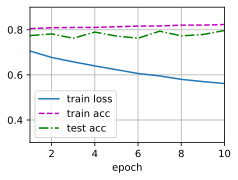

In [11]:
# 训练
num_epochs, lr = 10, 0.1
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)